# Tutorial5: visualize recovery results

---
This tutorial demonstrates visualize the 3D / 4D recovery results. \
By sampling a trained neural network at regular grid intervals we can visualize the recovered 3D emission as if it were in **flat space**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from flax.training import checkpoints
import os
import bhnerf
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

Welcome to eht-imaging! v 1.2.5 



In [2]:
"""
Load a checkpoint and Visualizer object
Note: make sure checkpoint_dir points to saved ceckpoint directory
"""
checkpoint_dir = '../checkpoints/tutorial3/recovery.2022-12-23.11:28:41/'
predictor = bhnerf.network.NeRF_Predictor.from_yml(checkpoint_dir)
state = checkpoints.restore_checkpoint(checkpoint_dir, None)

resolution = 128
visualizer = bhnerf.visualization.VolumeVisualizer(resolution, resolution, resolution)

In [6]:
"""
Define the position of the camera and sample/integrate emission according to the camera rays.
View the estimated emission at t=0 from multiple angles. 
Note that jit is useful for acceleration of many frames however the initial rendering will be slow due to compilation.
"""
bh_radius = 2.0
cam_r = 37.
linewidth = 0.1
rmax = predictor.rmax

images = []
for azimuth in tqdm(np.linspace(0.0, 360, 6)):
    visualizer.set_view(cam_r=cam_r, domain_r=rmax, azimuth=azimuth, zenith=np.pi/3)
    emission = bhnerf.network.sample_checkpoint_3d(predictor.apply, state['params'], coords=visualizer.coords)
    emission = emission / emission.max()
    image = visualizer.render(emission, facewidth=2.0*rmax, jit=False, bh_radius=bh_radius, linewidth=linewidth)
    images.append(image.clip(max=1))

  0%|          | 0/6 [00:00<?, ?it/s]

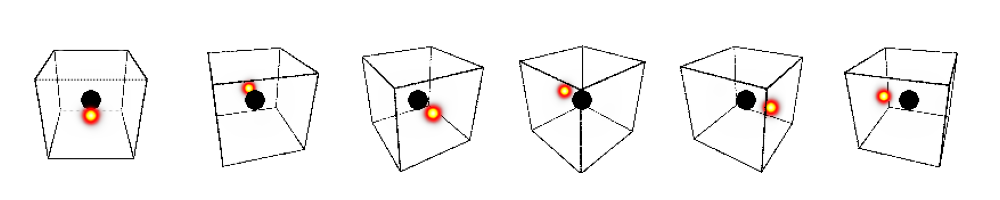

In [7]:
%matplotlib widget
fig, axes = plt.subplots(1, 6, figsize=(10,2))
for ax, image in zip(axes, images):
    ax.imshow(image)
    ax.axis('off');
plt.tight_layout()